# Customer segmantation

In this project, I am going to explore the [Wholesale customer](http://archive.ics.uci.edu/ml/datasets/Wholesale+customers) dataset from the UCI Machine Learning repository. The dataset contains data on various customers' annual spending in monetary units on diverse product categories. 

The goal of this project is to describe the variation in the different types of customers that this wholesale distributor interacts with. To do so, I will use an unsupervised machine learning clustering model to make the customer segmentation.

## Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_complete = pd.read_csv("Wholesale customers data.csv")

In [3]:
print("Dataset has {} samples with {} features each".format(*df_complete.shape))

Dataset has 440 samples with 8 features each


In [4]:
df_complete.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## Attributes description

The dataset attributes are:
* FRESH: annual spending on fresh products, in monetary units;
* MILK: annual spending on milk products, in monetary units;
* GROCERY: annual spending on grocery products, in monetary units;
* FROZEN: annual spending on frozen products, in monetary units;
* DETERGENTS_PAPER: annual spending on detergents and papaer products, in monetary units;
* DELICATESSEN: annual spending on delicatessen products, in monetary units;
* CHANNEL: customer channel, 1- Horeca(Hotel/Restaurant/Cafe) and 2-Retail;
* REGION: customer region, 1-Lisnon, 2-Oporto and 3-Other.

For the purpose of this project, the features 'CHANNEL' and 'REGION' will be excluded, I will only focus on the six products categories recorded for customers.
Another observation, in the dataset the attribute 'DELICATESSEN' is misspelled I will rename the feature in the dataframe.

In [5]:
# excluding channel and region features
df = df_complete.drop(['Region', 'Channel'], axis=1)
#renaming delicatessen feature
df.rename(columns={'Delicassen':'Delicatessen'}, inplace=True)

In [6]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


## Data Exploration

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicatessen      440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


In [8]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Histogram

In [9]:
def plot_histogram(df, cols=3, rows=2, width=20, height=15):
    fig = plt.figure(figsize=(width,height))
    for i, column in enumerate(df.columns):
        ax = fig.add_subplot(rows, cols, i+1)
        ax.set_title(column)
        g = sns.histplot(df[column])
        plt.xticks(rotation=25)
    plt.show()

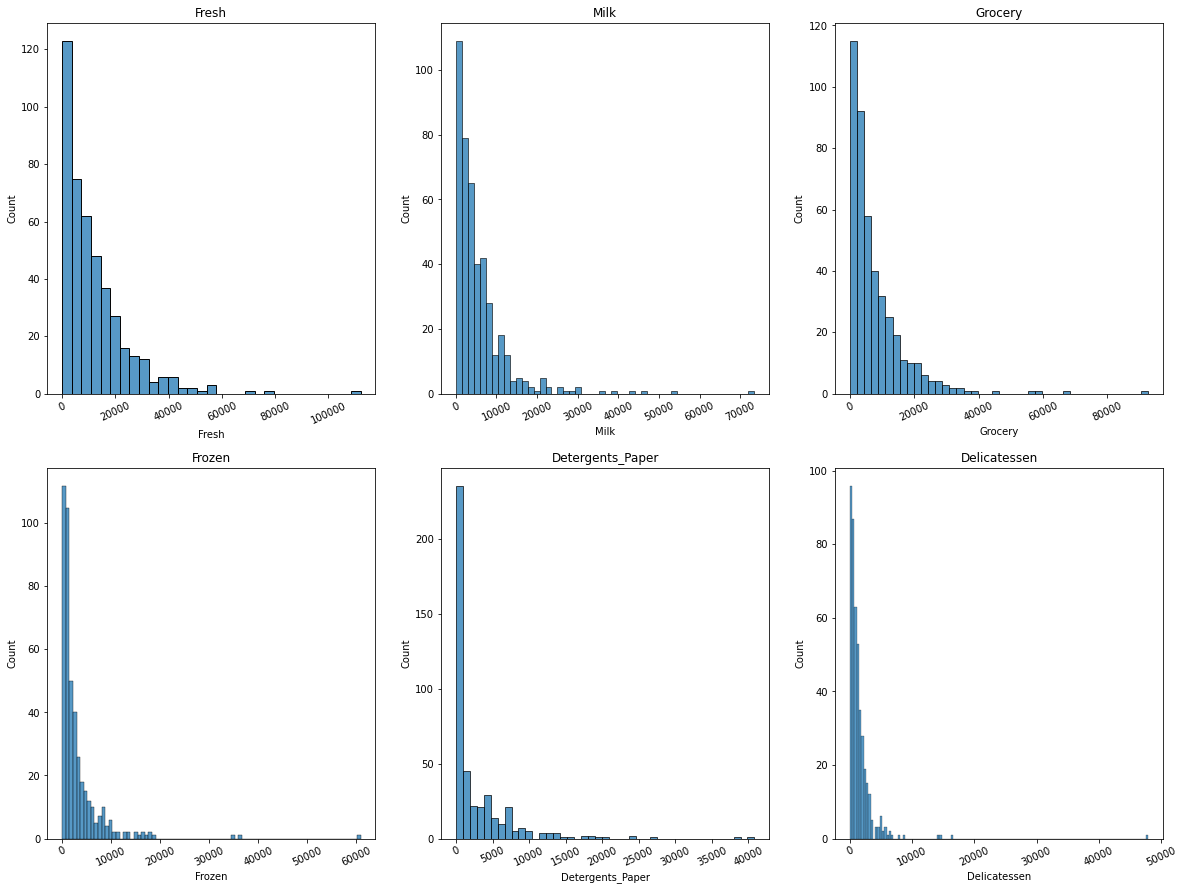

In [10]:
plot_histogram(df)

From the graphs it seems that the dataset has some outliers. Let's have a closer look with boxplot graphs.

In [11]:
def plot_boxplot(df, cols=3, rows=2, width=20, height=15):
    fig = plt.figure(figsize=(width,height))
    for i, column in enumerate(df.columns):
        ax = fig.add_subplot(rows, cols, i+1)
        ax.set_title(column)
        g = sns.boxplot(data = df[column])
        plt.xticks(rotation=25)
    plt.show()

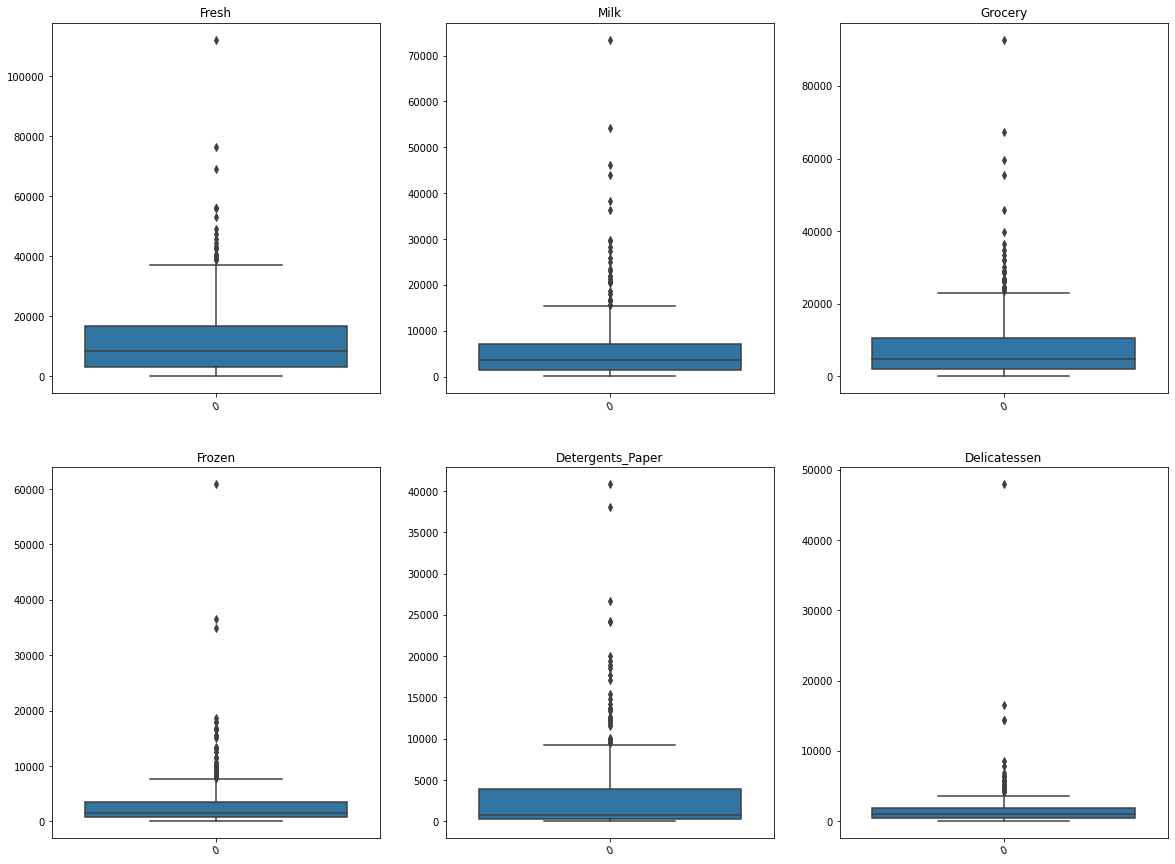

In [12]:
plot_boxplot(df)

The dataset indeed has some outliers, but they not necessarily need to be removed. In this situation I will assume that the data are correct, keeping them as it was provided.

### Feature scaling

As I am going to use a K-means algorithm, and it uses the distance as principal metric to alocate the data in a cluster, I will use a scaling method to prevent the model giving more relevance to large scale features despite the low scale ones.

In [13]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
df_scaled=df.copy()
df_scaled[df_scaled.columns]=std_scaler.fit_transform(df_scaled)

In [14]:
df_scaled.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


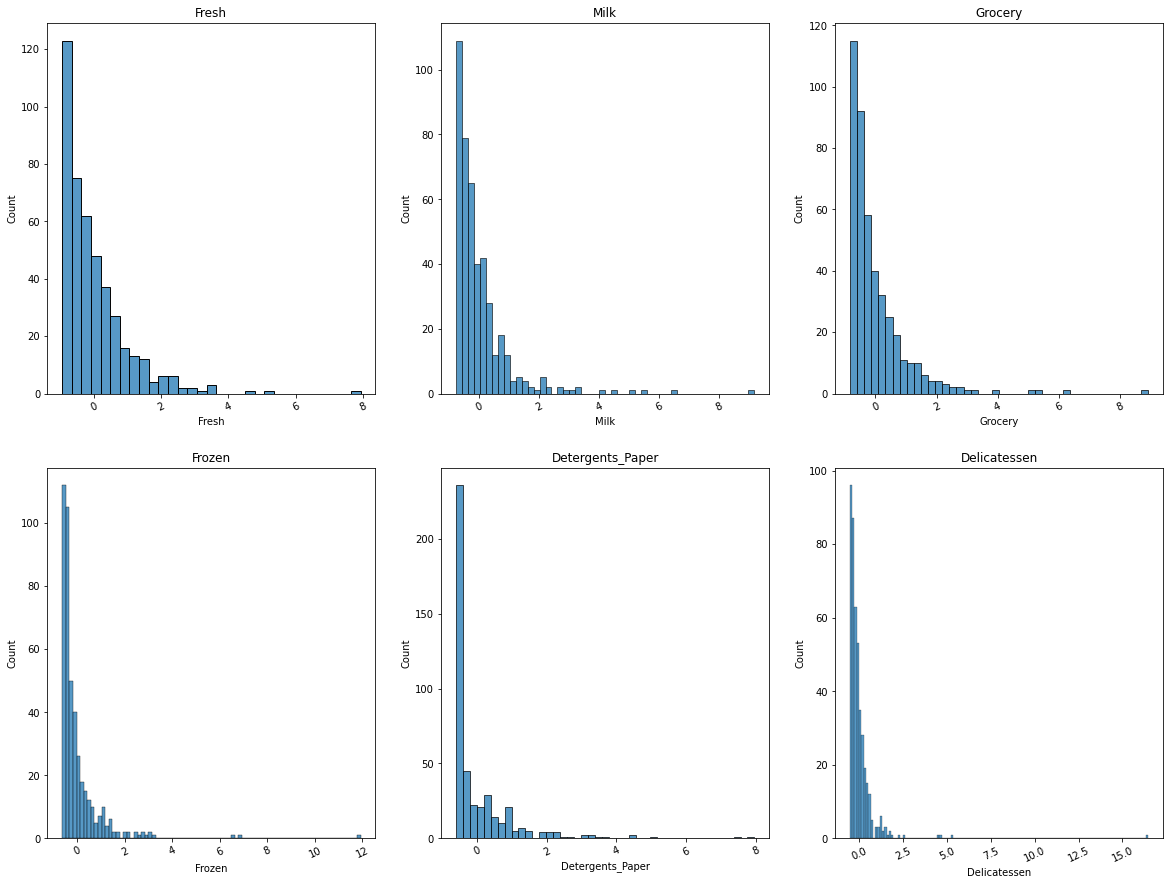

In [15]:
plot_histogram(df_scaled)

### Correlation
Not required for a clustering problem, but I will explore the relation of the features

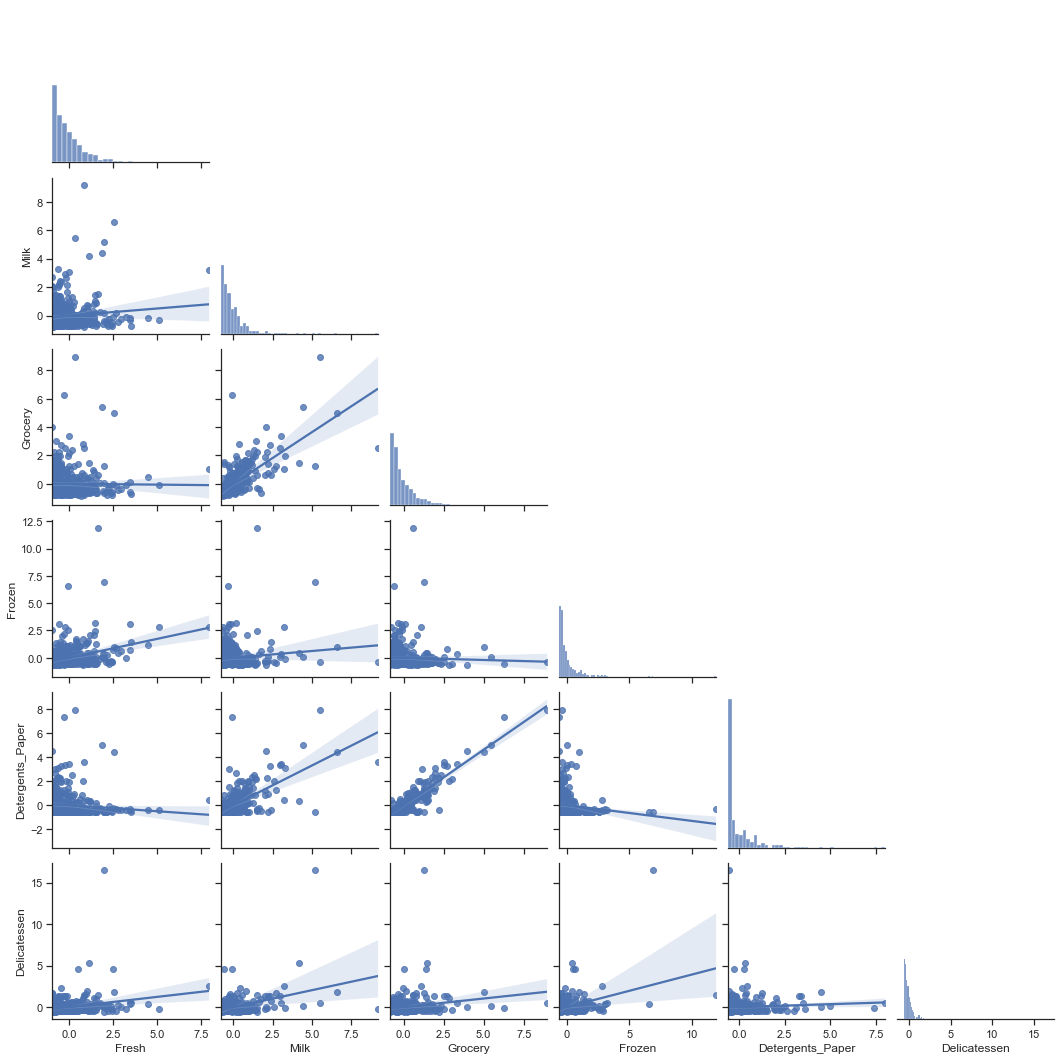

In [16]:
sns.set(style="ticks")
g = sns.pairplot(df_scaled,corner=True,kind='reg')
g.fig.set_size_inches(15,15)

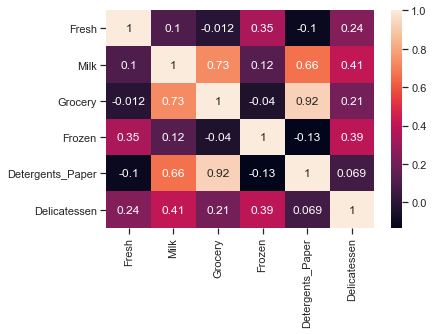

In [17]:
cor=df_scaled.corr()
sns.heatmap(cor,annot=True)
plt.show()

There is a strong correlation between detergent and paper products and the grocery products, meaning thar customers that buy detergents and papers often spend money in grocery products too.

## Feature transformation

As the dataset is multi-dimensional, I will use a Principal Component Analysis to reduce it's dimension and make the clusters visible in a cartesiann plane. Choosing only two dimensions will cause some information/variance losses.

In [18]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca_result = pca.fit_transform(df_scaled)

print ('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

Cumulative variance explained by 2 principal components: 72.46%


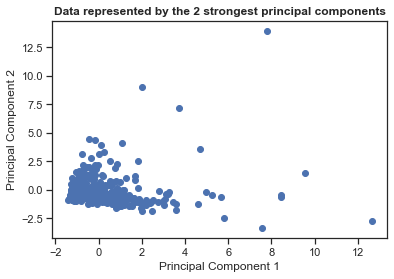

In [19]:
plt.scatter(x=pca_result[:, 0], y=pca_result[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data represented by the 2 strongest principal components',fontweight='bold')
plt.show()

## Clustering

To verify the best number of clusters(K) to the problem I will use two techniques: the Silhouette Score and K-means Inertia(elbow method),

The <b>Inertia</b> technique measures how well a dataset was clustered by K-means, it is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is that one with low inertia and a low number of clusters(K). However, this is a tradeoff because as K increases, inertia decreases.
To find the optimal K, use the Elbow method, finding the point where the decrease in inertia begins to decrease.

The <b>Silhouette score</b> is a metric that calculate the goodness of a clustering technique. The value ranges from -1 to 1 and means:
* 1: clusters are well apart from each other and are clearly distinguished;
* 0: clusters are indifferent, the distance between clusters is not significant;
* -1: clusters are assigned in the wrong way.
So, the bigger the score the better the clustering.

In [20]:
# K-Means Inertia and Silhouette score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = list()
silhouette ={}

for i in range(2,10):
    k_means = KMeans(n_clusters=i,
                    random_state = 42)
    k_means.fit(df_scaled)
    
    inertia.append(k_means.inertia_)
    
    silhouette[i] = silhouette_score(df, labels=k_means.labels_ , metric="euclidean")

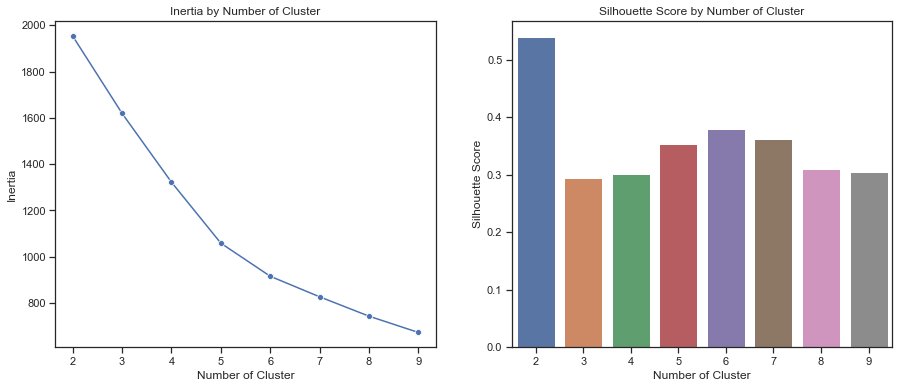

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

sns.lineplot(x=range(2,len(inertia)+2), y=inertia, marker="o", ax=ax[0])
ax[0].set_xlabel("Number of Cluster")
ax[0].set_ylabel("Inertia")
ax[0].set_title("Inertia by Number of Cluster")

sns.barplot(x=list(silhouette.keys()), y=list(silhouette.values()), ax=ax[1])
ax[1].set_title("Silhouette Score by Number of Cluster")
ax[1].set_xlabel("Number of Cluster")
ax[1].set_ylabel("Silhouette Score")
plt.show()

From the elbow method an optimal K would be 5, but from the silhouette technique K=2 should be chosen. 
Knowing the problem and considering that the elbow mehod only uses intra-cluster distances while the silhouette method uses a combination of inter and intra-cluster distances, I will consider the silhouette result, using K=2.

In [22]:
kmeans = KMeans(n_clusters = 2, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

pd.Series(kmeans_labels).value_counts()

0    401
1     39
dtype: int64

The first cluster has 401 customers and the second one has 39 customers.

### Cluster visualization

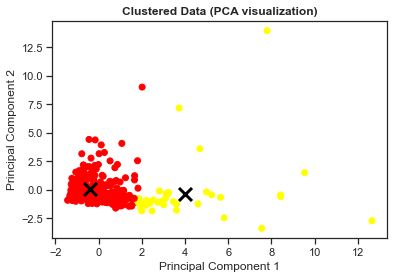

In [23]:
plt.scatter(x=pca_result[:, 0], y=pca_result[:, 1], c=kmeans_labels, cmap='autumn')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            marker='x', s=169, linewidths=3,
            color='black', zorder=10,lw=3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustered Data (PCA visualization)',fontweight='bold')
plt.show()

### Comparing the clusters

We can visualize each feature distribution according to each cluster.

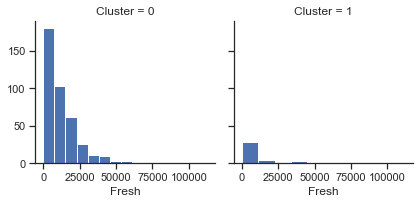

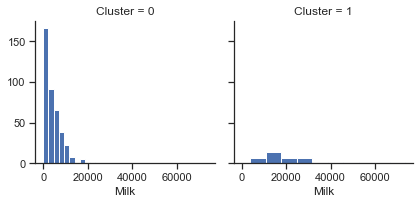

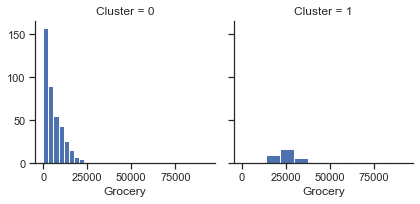

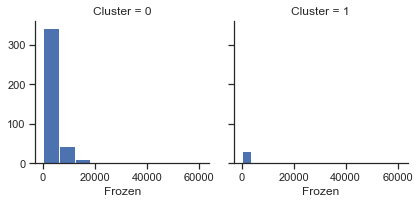

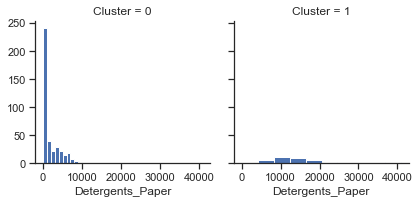

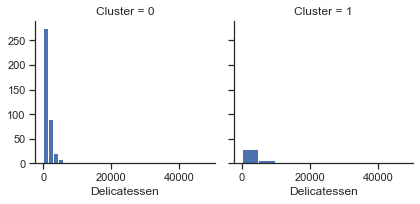

In [24]:
df2 = pd.DataFrame(data=std_scaler.inverse_transform(df_scaled), columns=df_scaled.columns)
df2['Cluster']= kmeans_labels

aux=df2.columns.tolist()
aux[0:len(aux)-1]

for cluster in aux[0:len(aux)-1]:
    grid= sns.FacetGrid(df2, col='Cluster')
    grid.map(plt.hist, cluster)

Comparing the centroids feature values with the all data mean, to see the distinguish characteristics

In [25]:
centroids_mean = np.vstack([centroids, np.array(df_scaled.describe().loc['mean'])])

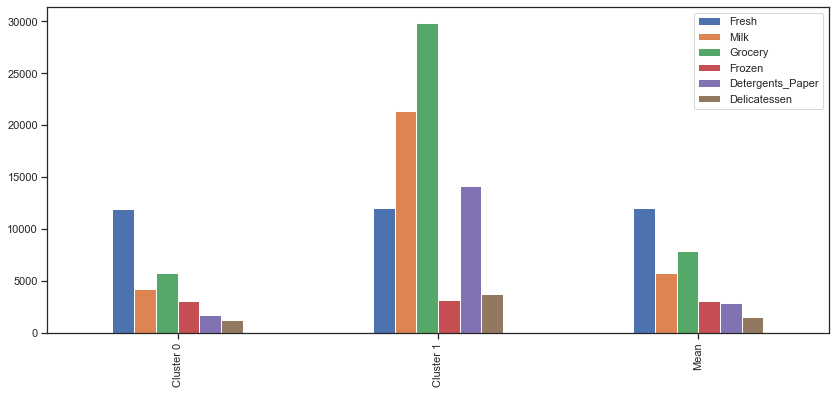

In [26]:
centroids_data=pd.DataFrame(data=std_scaler.inverse_transform(centroids_mean), columns=df_scaled.columns)
centroids_data.index = ['Cluster 0', 'Cluster 1', 'Mean']
_ = centroids_data.plot(kind='bar', figsize=(14,6))

The customers in the cluster 1 buys more milk, grocery and detergent and paper products than the mean, while the customers in the cluster 0 buy less than the mean of these products. 

The customers in the cluster 0 consume less of all products except of vegetables, these customer could be the hotels, cafes,  restaurants and even smalls fresh products retail shops.

I will compare the cluster segmentation with the channel feature available in the original dataset, that has the Horeca(Hotel/Restaurant/Cafe) or Retail as values.

In [61]:
df_compare = df2.copy()
df_compare['Channel'] = df_complete['Channel'].map({1:'Horeca', 2:'Retail'})
df_compare.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Cluster,Channel
0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0,0,Retail
1,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0,0,Retail
2,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0,0,Retail
3,13265.0,1196.0,4221.0,6404.0,507.0,1788.0,0,Horeca
4,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0,0,Retail


In [63]:
df_compare[['Cluster', 'Channel']].value_counts()

Cluster  Channel
0        Horeca     296
         Retail     105
1        Retail      37
         Horeca       2
dtype: int64

Almost all the Horeca(Hotel/Restaurant/Cafe) customers are in the first cluster, with some of the retail customers that could be those small fresh products markets.